In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Atividade 1

Considerar um sinal de tempo contínuo definido como:

$y(t) = cos(2\pi t) + sen(0,5\pi t) + 2$

- Obter a frequência em Hertz (ciclos/seg) e a frequência angular (rad/seg) dos termos em seno e cosseno.

- A partir da aproximação t = [-1:0.001:1], representar _t_, _y(t)_ num gráfico. Identificar o contradomínio e o período do sinal. (Dica: utilizar as funções - figure, plot e grid on) do Octave (Scilab, Matlab).

- Discretizar _y(t)_, ou seja, determinar _y(nTs)_ = _y[n]_, utilizando um período de amostragem Ts=0,01 segundos. Determinar a frequência em ciclos/amostra e a frequência angular (rads/amostra) dos termos em seno e cosseno.

- Gerar o gráfico _(n,y[n])_ num gráfico. Caracterizar o sinal _y[n]_ em termos de domínio e contradomínio. Obter o período fundamental do sinal. (Dica: utilizar as funções - figure, stem e grid on) do Octave (Scilab, Matlab).

- Escrever uma função que receba como argumento um sinal e que devolva a componente par do sinal.

- Escrever um programa que apresente as componentes ímpar e par do sinal, bem como a sua soma, num mesmo gráfico. Utilizar o programa com o sinal _y[n]_ e comente os resultados obtidos.

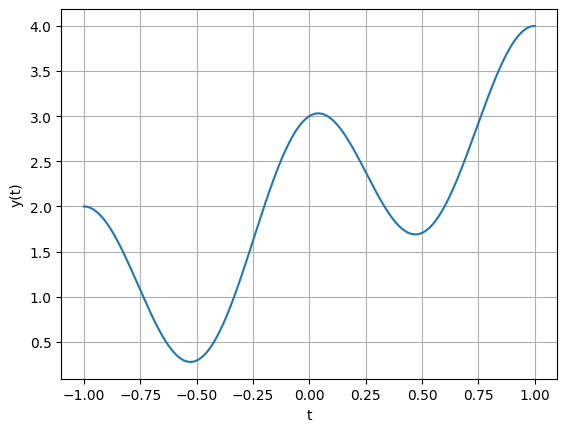

In [ ]:
t = np.arange(-1, 1.001, 0.001)
y = np.cos(2*np.pi*t) + np.sin(0.5*np.pi*t) + 2

# frequencia angular (ciclos/seg) e em Hertz
w_cos = 2*np.pi
f_cos = w_cos / (2*np.pi)  # 1 Hertz
w_sin = 0.5*np.pi
f_sin = w_sin / (2*np.pi)  # 0.25 Hertz

plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid()
plt.show()

In [ ]:
contradominio = [min(y), max(y)]
print(f'contradominio = {contradominio}')

T = 2*np.pi / w_sin
print(f'Periodo = {T}')

contradominio = [0.27790400722109965, 4.0]
Periodo = 4.0


Frequência do cosseno: 100.0 ciclos/amostra
Frequência angular do cosseno: 0.06283185307179587 rads/amostra
Frequência do seno: 25.0 ciclos/amostra
Frequência angular do seno: 0.015707963267948967 rads/amostra
Contradominio = [0.2780816542927016,4.0]


(-2.0, 2.0)

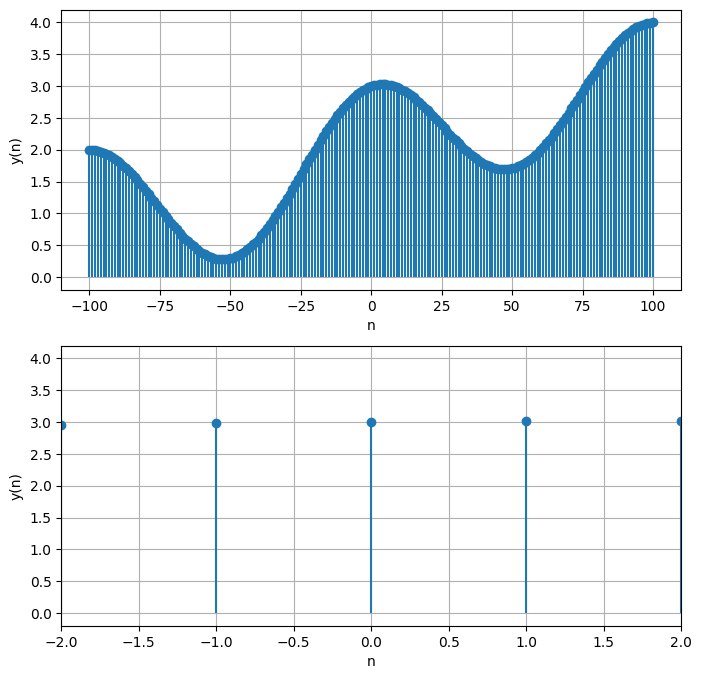

In [ ]:
Ts = 0.01
Fs = 1 / Ts
n = np.arange(-100, 101)
y = lambda n: np.cos(2*np.pi*n*Ts) + np.sin(0.5*np.pi*n*Ts) + 2
y_n = y(n)

f_cos_disc = f_cos / Ts
w_cos_disc = 2*np.pi*(f_cos/Fs)
f_sin_disc = f_sin / Ts
w_sin_disc = 2*np.pi*(f_sin/Fs)

print(f"Frequência do cosseno: {f_cos_disc} ciclos/amostra")
print(f"Frequência angular do cosseno: {w_cos_disc} rads/amostra")
print(f"Frequência do seno: {f_sin_disc} ciclos/amostra")
print(f"Frequência angular do seno: {w_sin_disc} rads/amostra")
print(f"Contradominio = [{min(y_n)},{max(y_n)}]")

fig, axes = plt.subplots(2,1, figsize=(8,8))
for ax in axes: ax.grid()
axes[0].stem(n,y_n, basefmt=' ')
axes[0].set_xlabel('n')
axes[0].set_ylabel('y(n)')
axes[1].stem(n,y_n, '.', basefmt=' ')
axes[1].set_xlabel('n')
axes[1].set_ylabel('y(n)')
axes[1].set_xlim([-2,2])

In [ ]:
def even_component(f, x):
  '''retorna a componente par de um sinal f'''
  return (f(x) + f(-x)) / 2

def signal_components(f, x):
  '''retorna as componentes pares e impares de um sinal f'''
  even = (f(x) + f(-x)) / 2
  odd = (f(x) - f(-x)) / 2
  return even, odd

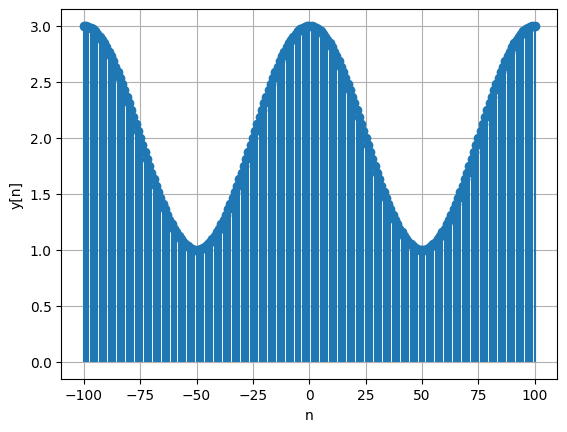

In [ ]:
par = even_component(y, n)
plt.stem(n, par, basefmt=" ")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.grid()

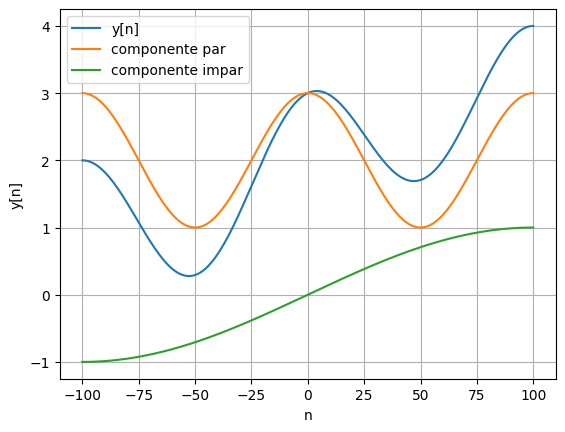

In [ ]:
par, impar = signal_components(y, n)
plt.plot(n, par+impar, label='y[n]')
plt.plot(n, par, label='componente par')
plt.plot(n, impar, label='componente impar')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.legend()
plt.grid()

## Atividade 2

- O arquivo MULHERES.wav no seu diretório de trabalho. Utilizar a função audiovread do Octave (Matlab) para ler os dados do arquivo acima e retornar os dados amostrados, a frequência de amostragem, _Fs_, e o número de bits por amostra, bits. Usar a função player do Octave (Scilab,Matlab) para reproduzir a música. Tentar utilizar um trecho de outra música.

- Usar o comando audioplayer para reproduzir a musica MULHERES.wav, com execução
invertida, com duração lenta e rápida.

- Escrever um programa em Octave (Scilab, Matlab) com argumentos de entrada _(x,a, b)_ e saída y tal que: _y(n) = x(a.n+b)_ . Reproduzir a saída da função. Comentar as modificações produzidas no sinal de entrada.

- Identificar as operações produzidas sobre a variável independente devido aos parâmetros _a_ e _b_.

In [ ]:
import sounddevice as sd

def play_audio(data, samplerate):
    sd.play(data, samplerate)
    sd.wait()

44100
16


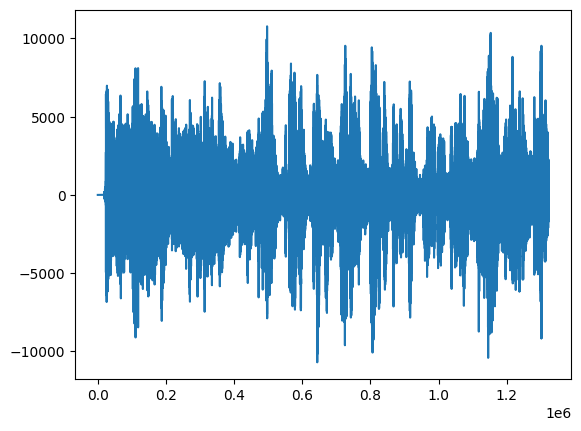

In [ ]:
from scipy.io import wavfile

# Lendo o arquivo de áudio
music = '../01_MULHERES.wav'
fs, y = wavfile.read(music)

bits_por_amostra = y.dtype.itemsize * 8

x = y[:, 0]  # Selecionando o primeiro canal
plt.plot(x)
#play_audio(y, fs)
print(fs)
print(bits_por_amostra)

In [ ]:
# audio invertido
reverso = np.flipud(y)
play_audio(reverso, fs)

In [ ]:
ligeiro_bala = int(fs * 1.75)  # Aumentando em 75%
play_audio(x, ligeiro_bala)

In [ ]:
devagarin = int(fs * 0.75)  # Reduzindo em 25%
play_audio(y, devagarin)

In [ ]:
def transforma_sinal(x, n, a=1, b=0):
    '''
        recebe um sinal e desloca e/ou comprime no tempo
        x: sinal (função)
        n: vetor dos instantes de tempo
        a: parâmetro de compressão/expansão
        b: parâmetro de deslocamento
    '''
    return x(a*n + b)

c:\Users\Kelvi\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


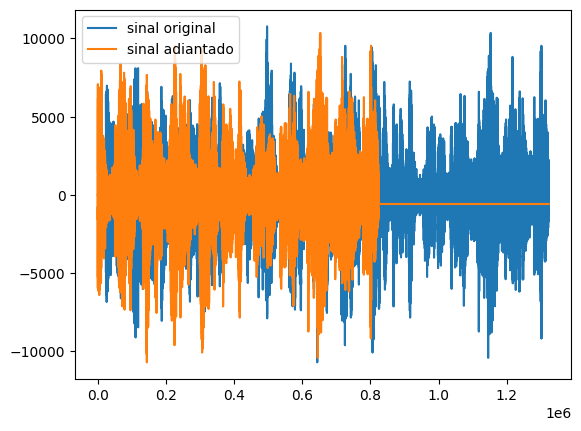

In [ ]:
def transforma(x, a, b):
    indices = np.round(np.arange(len(x)) * a + b).astype(int)
    return x[np.clip(indices, 0, len(x)-1)]

y_modificado = transforma(y, 1, 500000)
#play_audio(y_modificado, fs)
plt.plot(y[:, 0], label='sinal original')
plt.plot(y_modificado[:, 0], label='sinal adiantado')
plt.legend()
plt.show()

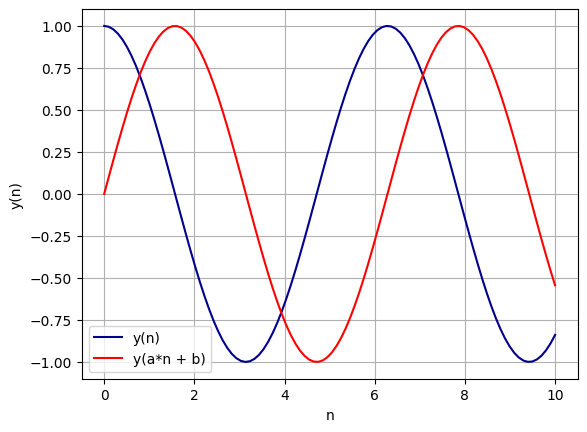

In [ ]:
n = np.linspace(0,10,100)
y1 = np.cos(n)
y2 = transforma_sinal(np.cos, n, 1, -np.pi/2)
plt.plot(n, y1, c='darkblue', label='y(n)')
plt.plot(n, y2, c='red', label='y(a*n + b)')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid()
plt.legend()
plt.show()

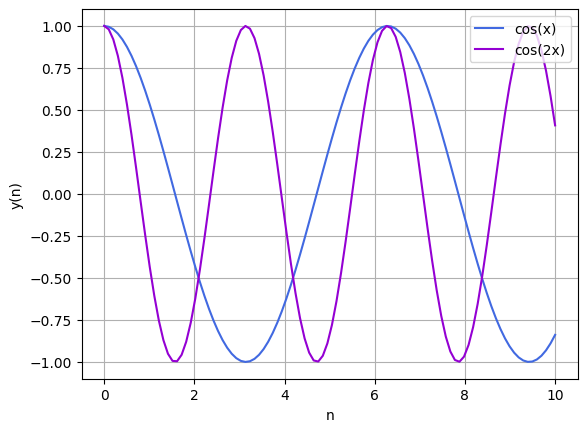

In [ ]:
n = np.linspace(0,10,100)
y1 = np.cos(n)
y2 = transforma_sinal(np.cos, n, 2, 0)
plt.plot(n, y1, c='royalblue', label='cos(x)')
plt.plot(n, y2, c='darkviolet', label='cos(2x)')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid()
plt.legend(loc=1)
plt.show()